In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

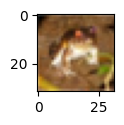

In [ ]:
plot_sample(0)

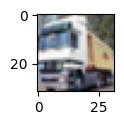

In [ ]:
plot_sample(1)

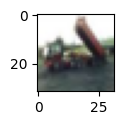

In [ ]:
plot_sample(2)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

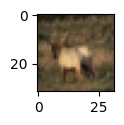

In [ ]:
plot_sample(3)

In [ ]:
y_train[3]

array([4], dtype=uint8)

In [ ]:
classes[y_train[3][0]]

'deer'

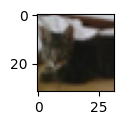

In [ ]:
plot_sample(9)

In [ ]:
y_train[9]

array([3], dtype=uint8)

In [ ]:
classes[y_train[9][0]]

'cat'

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled.shape #now the values are just between 0 and 1 we scaled it up to help our deep learning

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train , num_classes=10, dtype='float32'
)
y_train_categorical[:6]   #one hot encoding

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes=10, dtype='float32'
)

In [ ]:
y_train # if its not encoded we will use sparse categorical crossentropy

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical # this one hot encoded thats why we will use categorical crossentropy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.keras.layers.Dense(3000,activation='relu'),#in hidden layer "relu" activation function is prefered
    keras.keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid') #sigmoid is good with classification
                          ])
model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled,y_train_categorical)

Epoch 1/50
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8131 - accuracy: 0.3573
Epoch 2/50
1563/1563 [==============================] - 132s 84ms/step - loss: 1.6236 - accuracy: 0.4287
Epoch 3/50
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5403 - accuracy: 0.4567
Epoch 4/50
1563/1563 [==============================] - 130s 83ms/step - loss: 1.4788 - accuracy: 0.4783
Epoch 5/50
1563/1563 [==============================] - 140s 89ms/step - loss: 1.4311 - accuracy: 0.4959
Epoch 6/50
1563/1563 [==============================] - 131s 84ms/step - loss: 1.3868 - accuracy: 0.5128
Epoch 7/50
1563/1563 [==============================] - 132s 85ms/step - loss: 1.3501 - accuracy: 0.5283
Epoch 8/50
1563/1563 [==============================] - 127s 81ms/step - loss: 1.3119 - accuracy: 0.5394
Epoch 9/50
1563/1563 [==============================] - 132s 84ms/step - loss: 1.2825 - accuracy: 0.5507
Epoch 10/50
1563/1563 [==============================] 

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[9])]

313/313 [==============================] - 8s 27ms/step


'automobile'

In [ ]:
classes[y_test[9][0]]

'automobile'

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

NameError: name 'model' is not defined

In [1]:
from tensorflow.keras.models import load_model
